In [11]:
import numpy as np
import pandas as pd
import visualise_mis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### Using the methods in used in #2 to pre-process the data.
#### Didn't use the file directly as it is in a different branch.
#### Using winequality.csv

In [2]:
#undersampling data
def undersample(normal_indices,fraud_indices,times, Count_Fraud_transacation,data):#times denote the normal data = times*fraud data
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,(times*Count_Fraud_transacation),replace=True))
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = data.iloc[undersample_data,:]
    return(undersample_data)

### Loading data and undersampling it as the data is unbalanced (detailed analysis of this in PR for #2)

In [3]:
data_path = "../../../datasets/winequality.csv"
data = pd.read_csv(data_path)
Count_Fraud_transacation = len(data["recommend"]==True) 
fraud_indices= np.array((data.recommend==True).index)
normal_indices = np.array((data.recommend==False).index)
undersample_data = undersample(normal_indices,fraud_indices,3,Count_Fraud_transacation,data)
# since data is skewed, we add epsilon to data and take its logarithm
undersample_data[['fixed acidity','volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','sulphates','alcohol','quality']] = np.add(undersample_data[['fixed acidity','volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','sulphates','alcohol','quality']],0.00000001)
undersample_data[['fixed acidity','volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']] = np.log(undersample_data[['fixed acidity','volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']])
undersample_data.drop(["quality"],axis=1,inplace=True)
x_features= undersample_data.drop(["recommend"],axis=1,inplace=False)
x_labels=undersample_data["recommend"]
features_train,features_test,labels_train,labels_test = train_test_split(x_features,x_labels,test_size=0.3)


/home/kaaira/anaconda3/envs/presc/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/home/kaaira/anaconda3/envs/presc/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Using the classifier that gave best results with the data

In [4]:
clf= RandomForestClassifier(n_estimators=100)
clf.fit(features_train,labels_train.values.ravel())
pred=clf.predict(features_test)

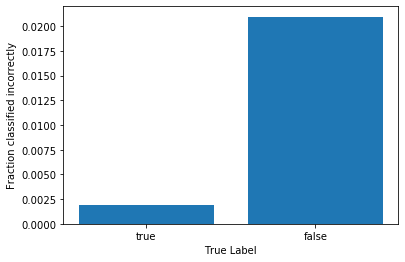

In [5]:
visualise_mis.visualise_misclassification(np.array(['true','false']),pred,labels_test)

### We can see from the above bars that mostly 'false' data is classified incorrectly. This points towards the fact that the dataset can still be a bit unbalanced. But still we see our model is working really good as the number of mis-classifications of both the types is very less.